In [98]:
import numpy as np
import matplotlib.pyplot as plt
from varname import varname

## Exercise

This exercises builds on what you completed in the last exercise by making use of functions.

*Why?*
This can be a helpful tool when you are dealing with multiple datasets and want to repeat tasks on them. It can save time and make your code <b>reusable</b>.

In [2]:
# this imports the python module numpy, which is necessary to load the data. We'll get to that later! 
import numpy as np

# Kiel temperatures
infile = "ue_data/data_OBS_DEU_P1D_T2M_2564.csv"
t_Kiel=np.loadtxt(infile, delimiter=';', skiprows=1, usecols=3).tolist()

# Antarctica temperatures
infile = "uedata/IDCJAC0010_300017_1800_Data.csv"
t_Ant=np.loadtxt(infile, delimiter=';', skiprows=1, usecols=5).tolist()

## 1. Temperature gradients


In [3]:
def t_grad(temp1, temp2):
    """ Function to calculate the difference between data in a list """
    return abs(temp1-temp2)

In [62]:
# calculate the temperature change in Kiel
K_grads=[]

# initiate loop
i=1
while i<len(t_Kiel):
    K_grads.append(t_grad(t_Kiel[i],t_Kiel[i-1]))
    i+=1
    
# now for Antarctica 
A_grads=[]

#initiate loop
i=1
while i<len(t_Ant):
    A_grads.append(t_grad(t_Ant[i],t_Ant[i-1]))
    i+=1

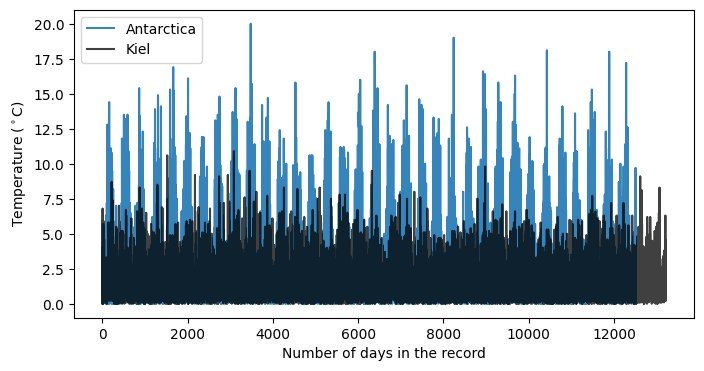

In [63]:
# visualise the different gradients
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(A_grads,label='Antarctica',alpha=0.9)
plt.plot(K_grads,'k',label='Kiel', alpha=0.75)
plt.legend()

# add x and y annotations
plt.xlabel('Number of days in the record')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## 2. Leap year

In [71]:
def leap_year(year):
    """Function to determine whether the year is a leap year"""
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    else:
        return False

For example, this function can be reused 1) to find when any arbitrary leap year is or 2) to be used in the temperature example. <br>
e.g. <br>
Consider the next 4 years...

In [65]:
# define the next four years
years = [2023,2024,2025,2026,2027]

# initiate loop to check each year
for year in years:
    # call the function to check whether the year is a leapyear
    is_leapyear=leap_year(year)
    if is_leapyear == True:
        print(year, 'is a leap year with 366 days, the others are regular years')

2024 is a leap year with 366 days, the others are regular years


Now if we consider our temperature dataset...

In [70]:
# create list of all years and lists for max/avg/min temp as well as max/avg grad
all_years = range(1986, 2022+1, 1)
max_temps = []
avg_temps = []
min_temps = []
max_grad = []
avg_grad = []

# comupte for 1986
# --------------------
days_1986 = 30+31+31+30+31+30+31  # days form 01.06.1986 to 31.12.1986

# set up counter of days and years
days_so_far = days_1986 
year = 1986

# seperate data of year 1986 (only half the year)
temperature_1986 = t_Kiel[:days_1986]
gradient_1986 = K_grads[:days_1986-1]

# get values for 1986
max_temps.append(max(temperature_1986))
avg_temps.append(np.mean(temperature_1986))
min_temps.append(min(temperature_1986))
max_grad.append(max(gradient_1986))
avg_grad.append(np.mean(gradient_1986))

# rest of the years
# -----------------
n_years = 2022-1986
for i in range(n_years):
    # increase year counter
    year += 1
    
    # CALL LEAP YEAR FUNCTION
    is_leap_year=leap_year(year)
    
    if is_leap_year==True:
        # slice temp and grad array to current year and safe as txt
        temp = t_Kiel[days_so_far:days_so_far+366]
        grad = K_grads[days_so_far:days_so_far+366]
        
        # save max/min/avg values for current year
        max_temps.append(max(temp))
        avg_temps.append(np.mean(temp))
        min_temps.append(min(temp))
        max_grad.append(max(grad))
        avg_grad.append(np.mean(grad))
        
        # increase days counter
        days_so_far += 366
        
    else: # is_leap_year==False
        # slice temp and grad array to current year and safe as txt
        temp = t_Kiel[days_so_far:days_so_far+365]
        grad = K_grads[days_so_far:days_so_far+365]
        
        # save max/min/avg values for current year
        max_temps.append(max(temp))
        avg_temps.append(np.mean(temp))
        min_temps.append(min(temp))
        max_grad.append(max(grad))
        avg_grad.append(np.mean(grad))
        
        # increase days counter
        days_so_far += 365
        

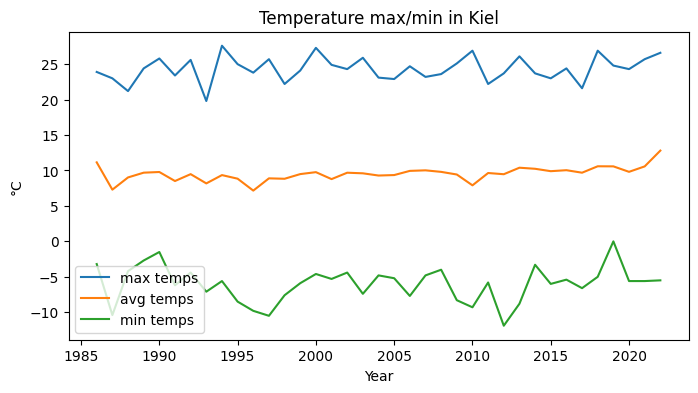

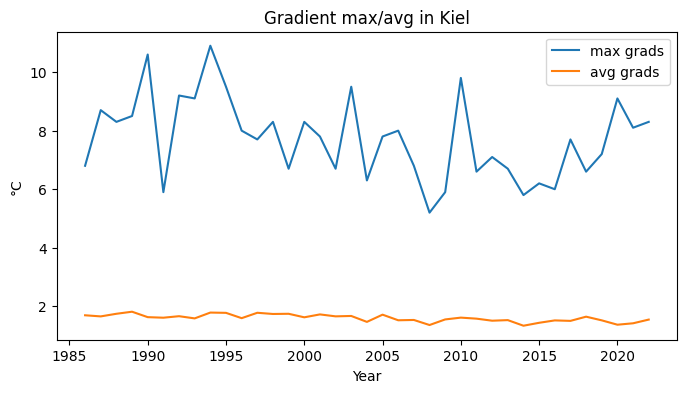

In [72]:
# define figure for temp
# ----------------------
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(all_years, max_temps, label='max temps')
plt.plot(all_years, avg_temps, label='avg temps')
plt.plot(all_years, min_temps, label='min temps')
plt.legend()

# add x and y axes annotation
plt.xlabel('Year')
plt.ylabel('°C')

# Gives title of the plot - choose appropriate one for your data set!
plt.title('Temperature max/min in Kiel')

# command to only show the plot, nothing else
plt.show()

# define figure for grad
# -----------------------
fig=plt.figure(figsize=(8,4))

# plot data
plt.plot(all_years, max_grad, label='max grads')
plt.plot(all_years, avg_grad, label='avg grads')
plt.legend()

# add x and y axes annotation
plt.xlabel('Year')
plt.ylabel('°C')

# Gives title of the plot - choose appropriate one for your data set!
plt.title('Gradient max/avg in Kiel')

# command to only show the plot, nothing else
plt.show()



#### Optional
Plot all the variables using a plotting function

When plotting similar datasets, such as the Kiel and Antarctica temperatures, we would repeat the same code in order to produce an image of them. We can use functions to visualise data too. <br>
e.g.

In [122]:
def plot_temps(data, title):
    fig = plt.figure(figsize=(8,4))
    plt.plot(data)
    plt.xlabel('Year')
    plt.ylabel('Temperature ($^\circ$C)')
    plt.title(title)
    return 

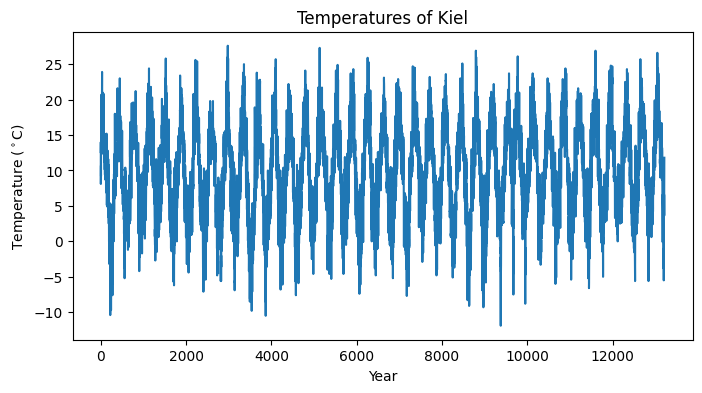

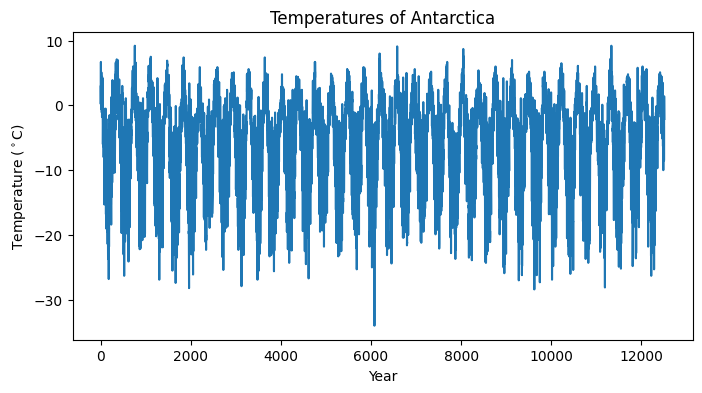

In [124]:
plot_temps(t_Kiel, 'Temperatures of Kiel')
plot_temps(t_Ant, 'Temperatures of Antarctica')

*incase you want to read more about plotting functions follow this link:*<br>
https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-1f4b8eba6aa1
